In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from plotting import histos
from processing import kinematics

In [2]:
base_path = "../reconstructions/SM_spin-ON_10k"

top_batches = list()
top_pre_batches = list()
tbar_batches = list()
tbar_pre_batches = list()
for batch_idx in range(10):
    top_batches.append(np.load(os.path.join(base_path, f"p_top_batch_{batch_idx}.npy")))
    top_pre_batches.append(np.load(os.path.join(base_path, f"p_top_pre_batch_{batch_idx}.npy")))
    tbar_batches.append(np.load(os.path.join(base_path, f"p_tbar_batch_{batch_idx}.npy")))
    tbar_pre_batches.append(np.load(os.path.join(base_path, f"p_tbar_pre_batch_{batch_idx}.npy")))
    
p_top = np.concatenate(top_batches, axis=0)
p_top_pre = np.concatenate(top_pre_batches, axis=0)
p_tbar = np.concatenate(tbar_batches, axis=0)
p_tbar_pre = np.concatenate(tbar_pre_batches, axis=0)

## Kinematics Comparison

../plotting/histos.py:140: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(legends)
../plotting/histos.py:145: RuntimeWarning: invalid value encountered in true_divide
  ref_frac_error = p_errors[reference_label]/ref_bins
../plotting/histos.py:149: RuntimeWarning: invalid value encountered in true_divide
  ratios = p_bins[label]/ref_bins
../plotting/histos.py:150: RuntimeWarning: invalid value encountered in true_divide
  error_ratio = ratios * (ref_frac_error + p_errors[label]/p_bins[label])


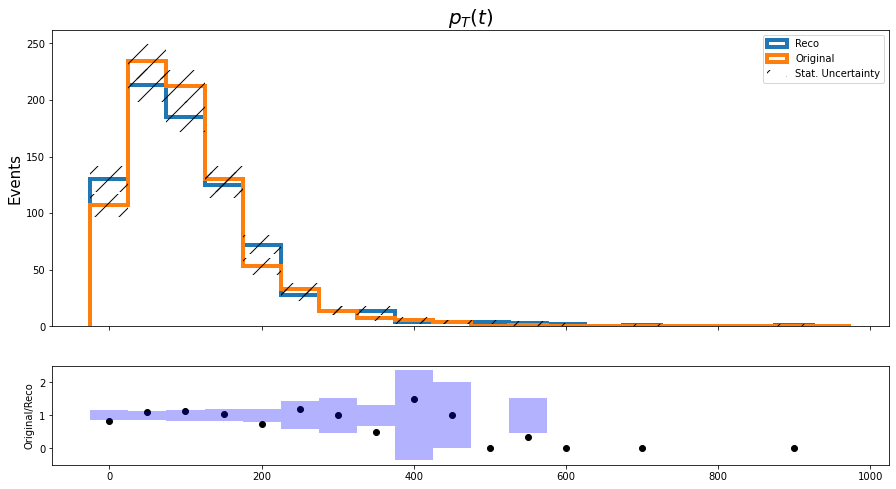

In [3]:
top_pt = np.sqrt(p_top[:, 0]**2 + p_top[:, 1]**2)
top_pre_pt = np.sqrt(p_top_pre[:, 0]**2 + p_top_pre[:, 1]**2)

histos.ratio_hist(
    processes_q=[top_pt, top_pre_pt],
    hist_labels=["Reco", "Original"],
    reference_label="Reco",
    n_bins=20,
    hist_range=(0, 1000),
    title=r"$p_T(t)$"
)

## $\Delta R(t, \bar{t})$

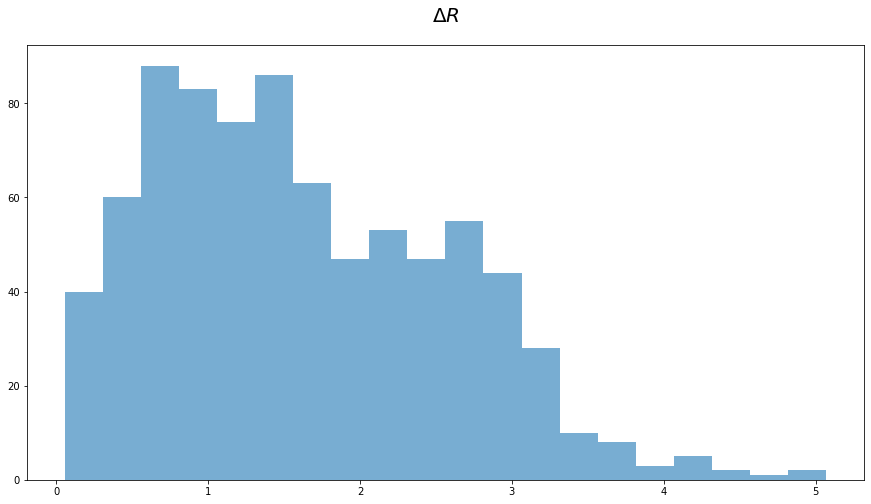

In [13]:
dR = kinematics.dR(p_top, p_top_pre)
_ = histos.hist_var(dR, label=r"$\Delta R$")